In [1]:
from plasma_classes import *
from plasma_utils import *
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
x_j_counter = 0

In [3]:
L = 1e-4
N_x = 100
N_p = 1000
h = L/N_x
tau = 1e-13
grid = np.linspace(0, L, N_x + 1)

In [4]:
n0 = 1e17
n1 = n0*N_x/N_p
q = 1.60217e-19
m = 9.1093837e-31
epsilon = 8.85e-12

In [5]:
particles = Particles(N_p, n1, -q, m)
nodes = Nodes(N_x)

In [6]:
set_homogeneous(particles, L)

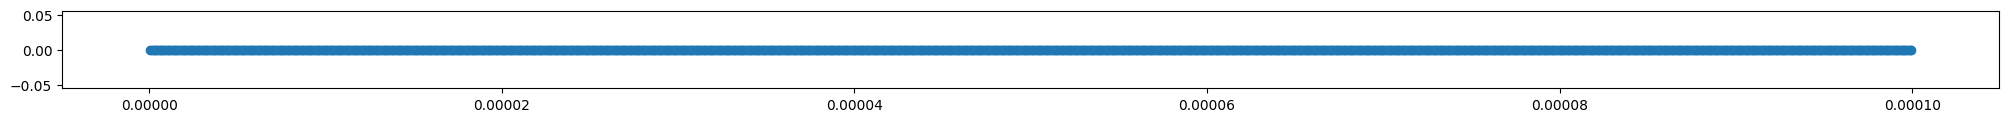

In [7]:
fig, ax = plt.subplots(1, 1)
ax.scatter(particles.x, np.zeros(particles.x.shape))
fig.set_size_inches((25, 1))


In [8]:
fraction = 10

In [9]:
delta = L/fraction

In [10]:
N_x/2- N_x/fraction

40.0

In [11]:
particles.x[int(0.5*N_p):int((0.5+1/fraction)*N_p)] -= delta

In [12]:
(0.5+fraction)*N_p

10500.0

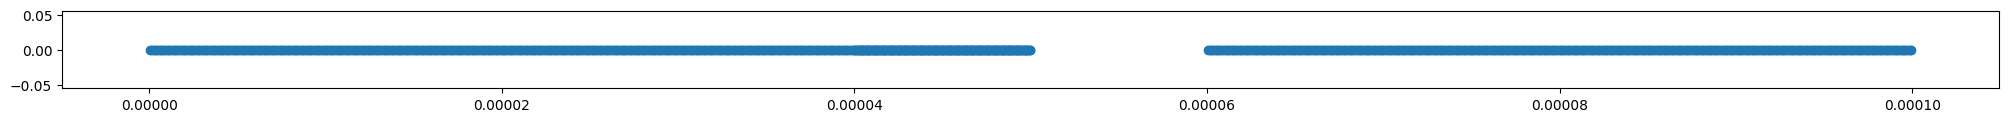

In [13]:
fig, ax = plt.subplots(1, 1)
ax.scatter(particles.x, np.zeros(particles.x.shape))
fig.set_size_inches((25, 1))


In [14]:
particles.normalise(h, tau)

In [15]:
nodes = Nodes(N_x)

In [16]:
get_rho(nodes, particles, periodic=True)

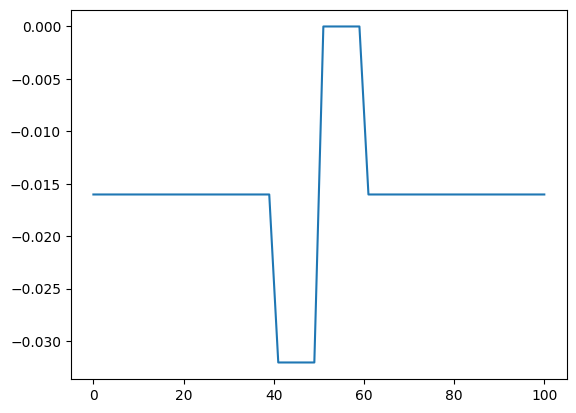

In [17]:
plt.plot(nodes.rho)

In [18]:
ion_constant = abs(nodes.rho[1].copy())

In [19]:
nodes.rho += ion_constant

In [20]:
#nodes.rho[0] = nodes.rho[-1] = 0

In [21]:
calc_fields(nodes, h, epsilon, periodic=True)

In [22]:
accel(particles, nodes, L, h, tau, zerostep=True)

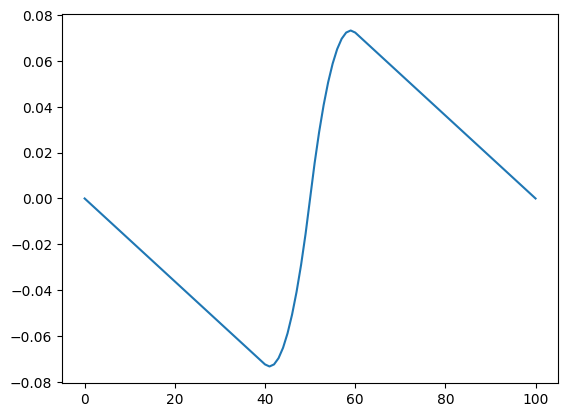

In [23]:
plt.plot(nodes.phi)

In [24]:
particles.v[550]

-1.2895552323270935e-05

In [25]:
n = 10000

In [26]:
history = []

In [27]:
rho_history = []

In [28]:
phi_history = []

In [29]:
def calc_kinetic_energy(particles: Particles, h: float, tau: float):
    if particles.normalised:
        particles.denormalise(h, tau)
    res = np.sum(particles.v**2)*particles.m*particles.concentration/2
    particles.normalise(h, tau)
    return res

In [30]:
def calc_electric_energy(particles: Particles, nodes: Nodes, h: float):
    res = 0
    rho = particles.q*particles.concentration
    for i in range(particles.n_macro):
        x = particles.x[i]
        phi = weight_field_value(x, nodes.phi)
        res += rho*phi/2
    return res


In [31]:
kinetic_history = []
electric_history = []
summ_history = []

In [32]:
rho_distr = []

In [33]:
for t in tqdm(range(n)):
    phi_history.append(nodes.phi.copy())
    try:
        move(particles, nodes, mode="periodic", consistency=True)
    except Exception:
        print("number of iteration: ", t)
        break
    get_rho(nodes, particles, periodic=True)
    
    nodes.rho += ion_constant
    mean_rho = np.mean(nodes.rho[int(N_x/2- N_x/fraction):int(N_x/2)])
    rho_history.append(mean_rho)
    rho_distr.append(nodes.rho.copy())
    calc_fields(nodes, h, epsilon, periodic=True)
    electric_history.append(calc_electric_energy(particles, nodes, h))
    accel(particles, nodes, L, h, tau)
    kinetic_history.append(calc_kinetic_energy(particles, h, tau))
    
    history.append(particles.x[int(5.5*N_p/10)])

100%|██████████| 10000/10000 [00:21<00:00, 476.09it/s]


In [34]:
for i in range(n):
    summ_history.append(kinetic_history[i] + electric_history[i])

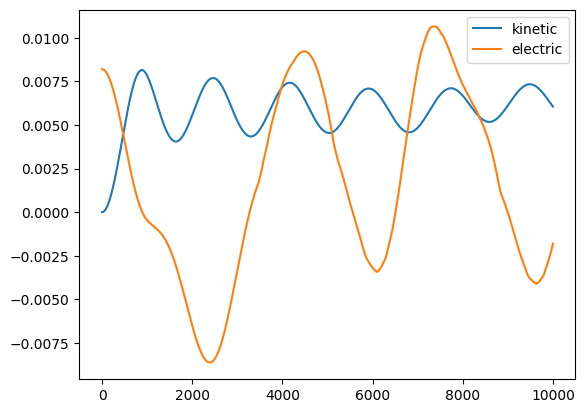

In [35]:
plt.plot(kinetic_history, label="kinetic")
plt.plot(electric_history, label="electric")
plt.legend()
plt.show()

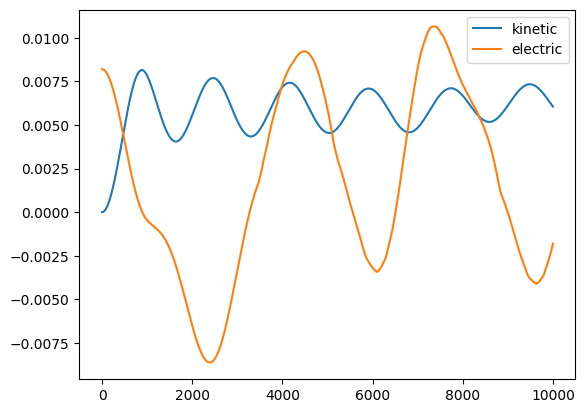

In [36]:
plt.plot(kinetic_history, label="kinetic")
plt.plot(electric_history, label="electric")
plt.legend()
plt.show()

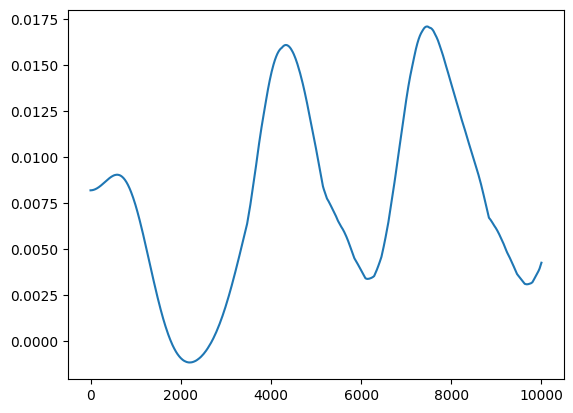

In [37]:
plt.plot(summ_history, label="sum")


In [38]:
np.mean(np.array(summ_history))

0.0075514939232141755

In [39]:
summ_history[0]

0.008193973122967314

In [40]:
history = np.array(history)*h
rho_history = np.array(rho_history)*h
phi_history = np.array(phi_history)*h

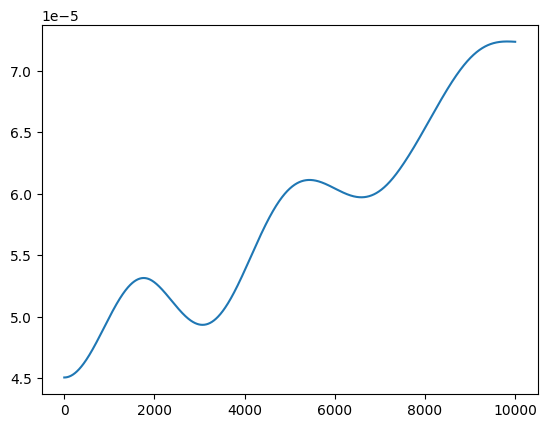

In [41]:
plt.plot(history)

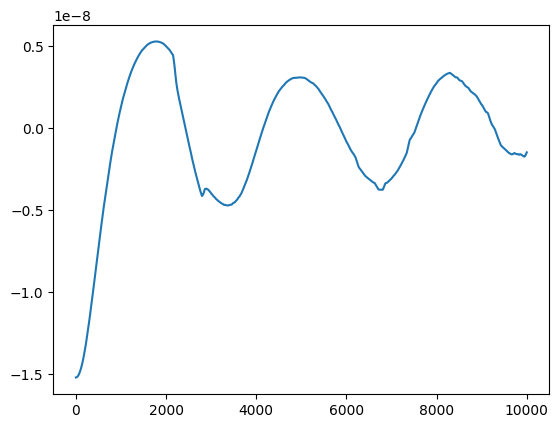

In [42]:
plt.plot(rho_history)

c:\Users\setup\Desktop\PlasmaPython\.venv\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


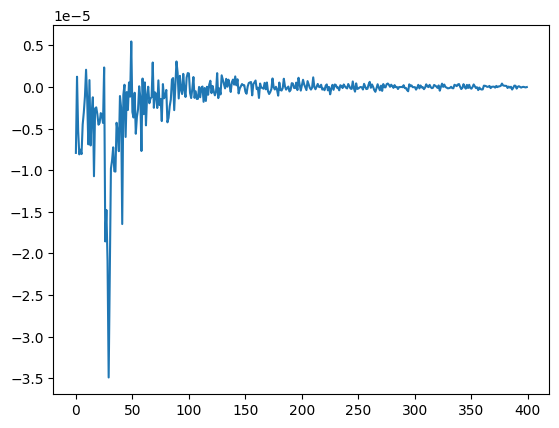

In [319]:
plt.plot(np.fft.rfft(rho_history)[:400])

In [320]:
tmax = np.argmin(np.fft.fft(rho_history)[1:100])

In [321]:
w_exp = tmax*2*np.pi/(n*tau)/1e10
w_exp

1.759291886010284

In [322]:
w_theory = math.sqrt(n0*q*q/(m*epsilon))/1e10
w_theory

1.784401018101099

In [143]:
n0_grid = np.linspace(0, 10, 1001)*1e17
w_theory_history = np.sqrt(n0_grid*q*q/(m*epsilon))

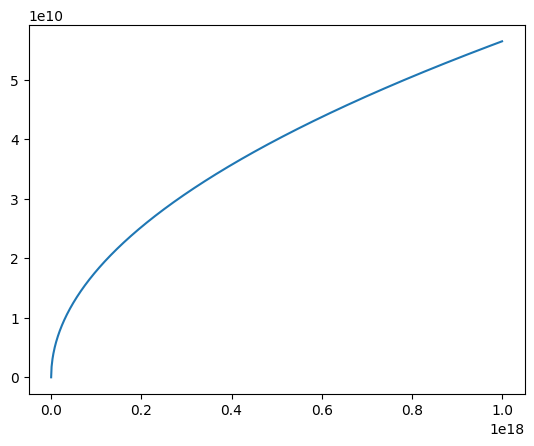

In [144]:
plt.plot(n0_grid, w_theory_history)

In [145]:
w_history = []
n0_history = []

In [146]:
w_history.append(w_exp*1e10)
n0_history.append(1e17)

In [263]:
L = 0.01
N_x = 100
N_p = 10000
h = L/N_x
tau = 5e-13
grid = np.linspace(0, L, N_x + 1)
n0 = 10*1e17
n1 = n0*N_x/N_p
q = 1.60217e-19
m = 9.1093837e-31
epsilon = 8.85e-12
particles = Particles(N_p, n1, -q, m)
nodes = Nodes(N_x)
set_homogeneous(particles, L)
fraction = 10
delta = L/fraction
N_x/2- N_x/fraction
particles.x[int(0.5*N_p):int((0.5+1/fraction)*N_p)] -= delta
particles.normalise(h, tau)
getrho(nodes, particles, periodic=True)
ion_constant = abs(nodes.rho[1].copy())
nodes.rho += ion_constant
calc_fields(nodes, h, epsilon)
accel(particles, nodes, L, h, tau, zerostep=True)
n = 5000
history = []
rho_history = []
for t in tqdm(range(n)):
    try:
        move(particles, nodes, mode="periodic", consistency=True)
    except Exception:
        print("number of iteration: ", t)
        break
    getrho(nodes, particles)
    mean_rho = np.mean(nodes.rho[int(N_x/2- N_x/fraction):int(N_x/2)])
    nodes.rho += ion_constant
    rho_history.append(mean_rho)
    calc_fields(nodes, h, epsilon)
    accel(particles, nodes, L, h, tau)
    history.append(particles.x[int(5.5*N_p/10)])
tmax = np.argmin(np.fft.rfft(rho_history)[1:])
w_exp = tmax*2*np.pi/(n*tau)

100%|██████████| 5000/5000 [01:11<00:00, 69.73it/s]


In [265]:
w_exp = tmax*2*np.pi/(n*tau)/1e10
w_exp

5.529203070318035

In [267]:
w_theory = math.sqrt(n0*q*q/(m*epsilon))/1e10
w_theory

5.642771476322818

In [268]:
w_exp/w_theory

0.9798736478198136

In [182]:
n0_history.append(n0)
w_history.append(w_exp)

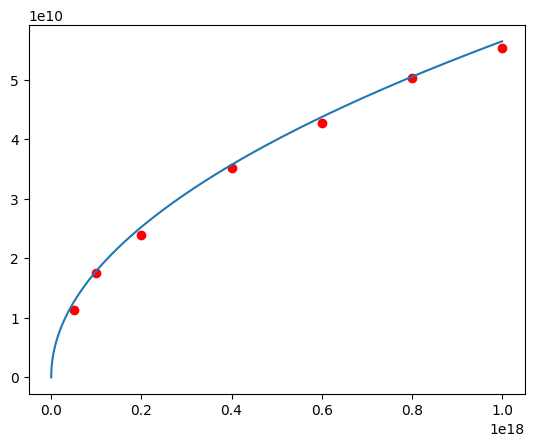

In [183]:
plt.scatter(n0_history, w_history, color = 'r')
plt.plot(n0_grid, w_theory_history)

In [179]:
del n0_history[-2]
del w_history[-2]

MovieWriter imagemagick unavailable; using Pillow instead.


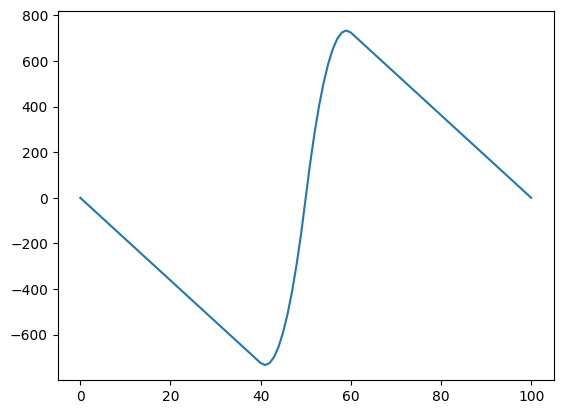

In [104]:
fig, ax = plt.subplots()

#  Создаем функцию, генерирующую картинки
#  для последующей "склейки":
y_min = min([np.min(arr) for arr in phi_history])
y_max = max([np.max(arr) for arr in phi_history])
def animate(i):
    ax.clear()
    ax.set_ylim(y_min, y_max)
    line = ax.plot(phi_history[i])
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=range(n),
                                      interval = 5,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('моя анимация.gif',
                 writer='imagemagick', 
                 fps=30)

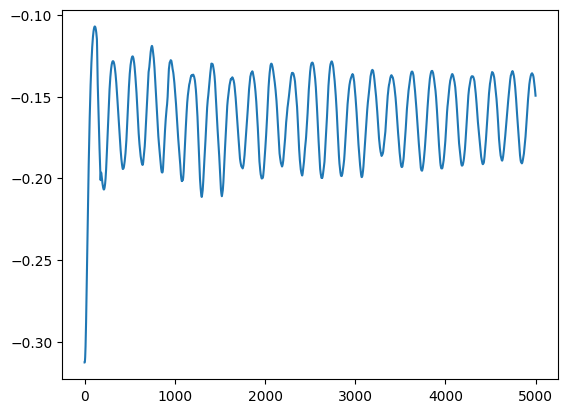

In [184]:
plt.plot(rho_history)